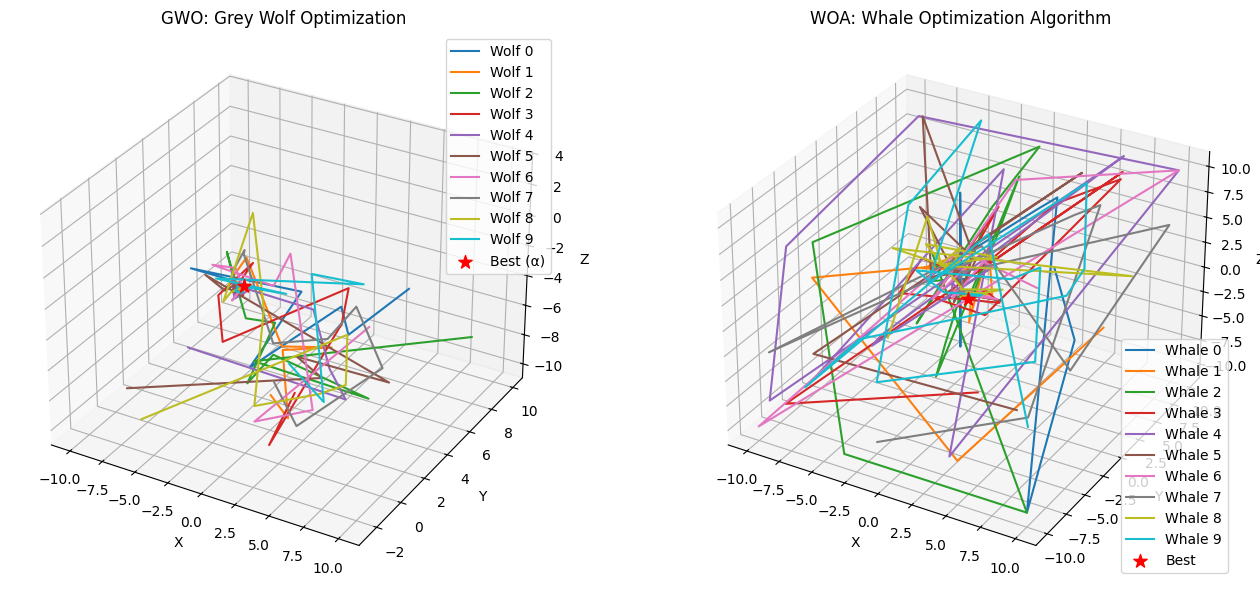

In [6]:
# Re-import after code execution state reset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define an objective function (sphere function)
def objective_function(position):
    return np.sum(position ** 2)

# Grey Wolf Optimizer (GWO)
def gwo(num_wolves, dim, lb, ub, max_iter):
    positions = np.random.uniform(lb, ub, (num_wolves, dim))
    alpha_pos = beta_pos = delta_pos = np.zeros(dim)
    alpha_score = beta_score = delta_score = float("inf")
    history = []

    for t in range(max_iter):
        for i in range(num_wolves):
            fitness = objective_function(positions[i])
            if fitness < alpha_score:
                alpha_score, alpha_pos = fitness, positions[i].copy()
            elif fitness < beta_score:
                beta_score, beta_pos = fitness, positions[i].copy()
            elif fitness < delta_score:
                delta_score, delta_pos = fitness, positions[i].copy()

        a = 2 - t * (2 / max_iter)
        for i in range(num_wolves):
            X1 = X2 = X3 = np.zeros(dim)
            for leader_pos in [alpha_pos, beta_pos, delta_pos]:
                r1, r2 = np.random.rand(dim), np.random.rand(dim)
                A = 2 * a * r1 - a
                C = 2 * r2
                D = np.abs(C * leader_pos - positions[i])
                X = leader_pos - A * D
                if np.array_equal(leader_pos, alpha_pos):
                    X1 = X
                elif np.array_equal(leader_pos, beta_pos):
                    X2 = X
                else:
                    X3 = X
            positions[i] = (X1 + X2 + X3) / 3.0
            positions[i] = np.clip(positions[i], lb, ub)

        history.append(positions.copy())

    return alpha_pos, alpha_score, history

# Whale Optimization Algorithm (WOA)
def woa(num_whales, dim, lb, ub, max_iter):
    positions = np.random.uniform(lb, ub, (num_whales, dim))
    best_position = positions[0]
    best_score = objective_function(best_position)
    history = []

    for t in range(max_iter):
        a = 2 - t * (2 / max_iter)
        for i in range(num_whales):
            fitness = objective_function(positions[i])
            if fitness < best_score:
                best_score = fitness
                best_position = positions[i].copy()

        new_positions = []
        for i in range(num_whales):
            r1, r2 = np.random.rand(dim), np.random.rand(dim)
            A = 2 * a * r1 - a
            C = 2 * r2
            p = np.random.rand()
            if p < 0.5:
                if np.linalg.norm(A) < 1:
                    D = np.abs(C * best_position - positions[i])
                    new_pos = best_position - A * D
                else:
                    rand_idx = np.random.randint(num_whales)
                    X_rand = positions[rand_idx]
                    D = np.abs(C * X_rand - positions[i])
                    new_pos = X_rand - A * D
            else:
                D_prime = np.abs(best_position - positions[i])
                b = 1
                l = np.random.uniform(-1, 1)
                new_pos = D_prime * np.exp(b * l) * np.cos(2 * np.pi * l) + best_position

            new_pos = np.clip(new_pos, lb, ub)
            new_positions.append(new_pos)

        positions = np.array(new_positions)
        history.append(positions.copy())

    return best_position, best_score, history

# Run GWO and WOA
num_agents = 10
dim = 3
lb, ub = -10, 10
max_iter = 30

gwo_best_pos, gwo_best_score, gwo_history = gwo(num_agents, dim, lb, ub, max_iter)
woa_best_pos, woa_best_score, woa_history = woa(num_agents, dim, lb, ub, max_iter)

# Plot GWO vs WOA 3D
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# GWO trajectory
for i in range(num_agents):
    traj = np.array([gwo_history[t][i] for t in range(max_iter)])
    ax1.plot(traj[:, 0], traj[:, 1], traj[:, 2], label=f'Wolf {i}')
ax1.set_title("GWO: Grey Wolf Optimization")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.scatter(*gwo_best_pos, color='red', s=100, label="Best (α)", marker='*')
ax1.legend()

# WOA trajectory
for i in range(num_agents):
    traj = np.array([woa_history[t][i] for t in range(max_iter)])
    ax2.plot(traj[:, 0], traj[:, 1], traj[:, 2], label=f'Whale {i}')
ax2.set_title("WOA: Whale Optimization Algorithm")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
ax2.scatter(*woa_best_pos, color='red', s=100, label="Best", marker='*')
ax2.legend()

plt.tight_layout()
plt.show()
